In [3]:
# Create an alphabetically sorted list of all the files in the directory

import os

# Get the list of all files and directories
files = os.listdir('bin_formula_images')

# Print the number of files
print('Total files:', len(files))

# Print the first 5 filenames
print('First 5 files:', files[:5])

# Sort the files
files.sort()

# Print the first 5 filenames
print('Sorted files:', files[:5])

Total files: 103536
First 5 files: ['100009e256.png', '10007a9101.png', '1000a29807.png', '1000f2a2d2.png', '10011a6bf8.png']
Sorted files: ['100009e256.png', '10007a9101.png', '1000a29807.png', '1000f2a2d2.png', '10011a6bf8.png']


In [9]:
# Load the formula indices from the .lst file
with open('data/im2latex_formulas_norm.lst', 'r', newline='\n') as f:
    formulas = []
    for formula in f.readlines():
        formulas.append(formula.strip())
print('Number of formulas: {}'.format((len(formulas))-1))
if len(formulas)-1 != 103558:
    print('\nError: Number of formulas does not match the number of formulas in the .lst file\n')

# Load the image-formula mapping from the .lst file
im2formula = {}
with open('data/im2latex_validate.lst', 'r') as f:
    for line in f:
        formula_idx, image_name, _ = line.strip().split()
        im2formula[image_name + '.png'] = formulas[int(formula_idx)]
print('Number of im2formula mappings: {}'.format(len(im2formula)))



Number of formulas: 103558
Number of im2formula mappings: 9320


Label: \int_{-\epsilon}^\infty dl\: {\rm e}^{-l\zeta} \int_{-\epsilon}^\infty dl' {\rm e}^{-l'\zeta} ll'{l'-l \over l+l'} \{3\,\delta''(l) - {3 \over 4}t\,\delta(l) \} =0. \label{eq21}


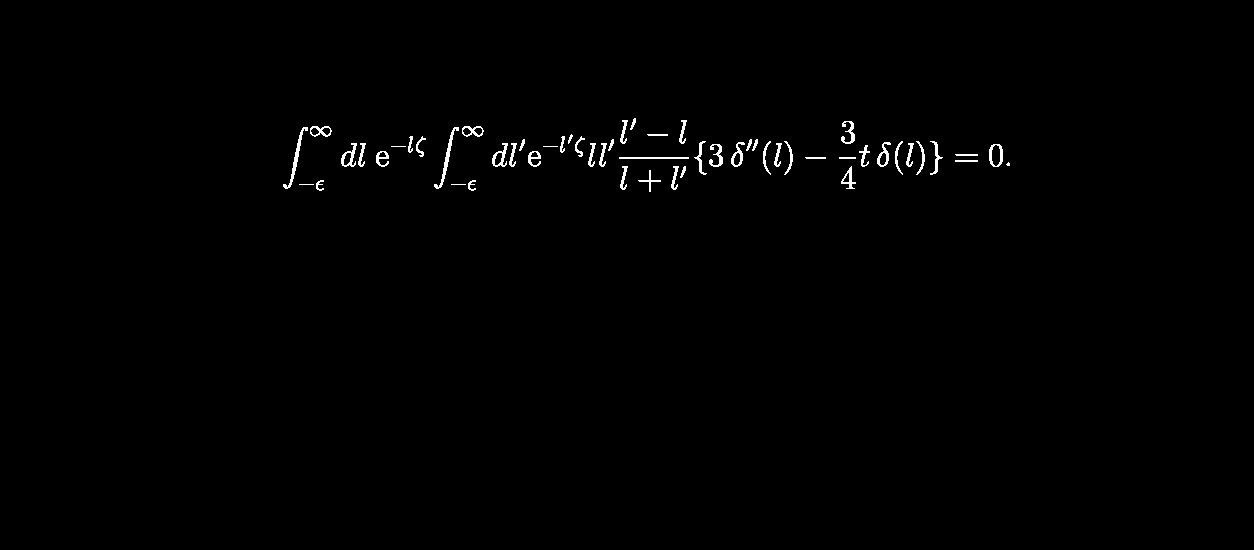

In [10]:
import cv2

from PIL import Image
from IPython.display import display

labels = list(im2formula.keys())

index = 0

image_name = labels[index]

# Load the image from a file path
img_path = os.path.join('bin_formula_images', image_name)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Convert the image to a PIL image
img = Image.fromarray(img)

label = im2formula[image_name]


# Print the label
print('Label: {}'.format(label))

# Show the image in Jupyter notebook
display(img)


In [11]:
import cv2

from PIL import Image
from IPython.display import display

out_img_dir = 'processed_data/validate_images/'
out_formula_file = 'processed_data/validate_formulas.txt'

labels = list(im2formula.keys())

formula_file = open(out_formula_file, 'w')

for index in range(len(labels)):

    image_name = labels[index]

    # Load the image from a file path
    img_path = os.path.join('bin_formula_images', image_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Convert the image to a PIL image
    img = Image.fromarray(img)

    label = im2formula[image_name]

    # Save the image
    img.save(out_img_dir + image_name)

    # Save the formula
    string = image_name + ' ' + label + '\n'

    formula_file.write(string)

    if index % 1000 == 0:
        print('Saved {} images'.format(index))

formula_file.close()


Saved 0 images
Saved 1000 images
Saved 2000 images
Saved 3000 images
Saved 4000 images
Saved 5000 images
Saved 6000 images
Saved 7000 images
Saved 8000 images
Saved 9000 images


In [68]:
# Print the number of files in processed_data/train_images
print('Number of files in processed_data/train_images:', len(os.listdir('processed_data/train_images')))
# Print the number of lines in processed_data/train_formulas.txt
print('Number of lines in processed_data/train_formulas.txt:', len(open('processed_data/train_formulas.txt').readlines()))

# Print the number of files in processed_data/test_images
print('Number of files in processed_data/test_images:', len(os.listdir('processed_data/test_images')))
# Print the number of lines in processed_data/test_formulas.txt
print('Number of lines in processed_data/test_formulas.txt:', len(open('processed_data/test_formulas.txt').readlines()))

# Print the number of files in processed_data/validate_images
print('Number of files in processed_data/validate_images:', len(os.listdir('processed_data/validate_images')))
# Print the number of lines in processed_data/validate_formulas.txt
print('Number of lines in processed_data/validate_formulas.txt:', len(open('processed_data/validate_formulas.txt').readlines()))

# Print the number of files in processed_data/all_images
print('Number of files in processed_data/all_images:', len(os.listdir('processed_data/all_images')))
# Print the number of lines in processed_data/formulas.txt
print('Number of lines in processed_data/all_formulas.txt:', len(open('processed_data/all_formulas.txt').readlines()))


# Print the sum of the number of files in processed_data/train_images, processed_data/test_images, and processed_data/validate_images
print('Sum of the number of files:', len(os.listdir('processed_data/train_images')) + len(os.listdir('processed_data/test_images')) + len(os.listdir('processed_data/validate_images')))

Number of files in processed_data/train_images: 83870
Number of lines in processed_data/train_formulas.txt: 83870
Number of files in processed_data/test_images: 10355
Number of lines in processed_data/test_formulas.txt: 10355
Number of files in processed_data/validate_images: 9320
Number of lines in processed_data/validate_formulas.txt: 9320
Number of files in processed_data/all_images: 103536
Number of lines in processed_data/all_formulas.txt: 103536
Sum of the number of files: 103545


In [65]:

# ['467a4dc80c.png', '10220a1920.png', '5f328ba860.png', '8237a4c556.png', '7c99ded238.png', '4ff536a32d.png', '662f0b83e3.png', '436abf1fe0.png', '50cd4d5615.png']


103545
103536


In [70]:
import cv2
import re
from PIL import Image
from torch.utils.data import Dataset
import os

class DataLoader(Dataset):
    def __init__(self, image_directory, mapping_file, vocab_list, transform=None, tokens=50):
        self.image_directory = image_directory
        self.transform = transform
        self.vocab_list = vocab_list
        self.tokens = tokens

        # Save the paths of the images
        self.image_paths = []
        for image_name in os.listdir(image_directory):
            self.image_paths.append(os.path.join(image_directory, image_name))

        # Load the image-formula mapping from the .lst file
        self.im2formula = {}
        with open(mapping_file, 'r') as f:
            for line in f:
                # Get the first item of the line
                image_name = line.strip().split()[0]
                # Get everything except the first item of the line, and join them together
                formula = ' '.join(line.strip().split()[1:])

        print('Number of images: {}'.format(len(self.image_paths)))
        print('Number of im2formula mappings: {}'.format(len(self.im2formula)))

    # Tokenize the formula
    def split_string_by_tokens(string, vocab):
        # Sort the vocabulary by length in descending order
        vocab = sorted(vocab, key=len, reverse=True)

        # Generate a regular expression pattern that matches any of the vocabulary words
        pattern = "|".join(re.escape(word) for word in vocab)
        
        # Use the pattern to split the string into tokens
        tokens = re.findall(pattern, string)
        

        # Add unknown tokens for any characters not matched by the pattern
        str_index = 0
        updated_tokens = []
        i = 0
        while i < (len(tokens)):
            cur_token = tokens[i]
            if string[str_index:str_index+len(cur_token)] == cur_token:
                updated_tokens.append(cur_token)
                str_index += len(cur_token)
                i += 1
            else:
                updated_tokens.append(f"<unk>")
                str_index += 1

        if str_index != len(string):
            for i in range(len(string) - str_index):
                updated_tokens.append(f"<unk>") 

        return updated_tokens

    def __len__(self):
        return len(self.im2formula)
    
    def __getitem__(self, index):
        image_names = list(self.im2formula.keys())
        image_name = image_names[index]

        # Load the image from a file path
        img = cv2.imread(self.image_paths[index], cv2.IMREAD_GRAYSCALE)

        # Convert the image to a PIL image
        img = Image.fromarray(img)

        formula = self.im2formula[image_name]

        if self.transform:
            img = self.transform(img)
        
        # Tokenize the formula
        tokenized_formula = DataLoader.split_string_by_tokens(formula, self.vocab_list)

        if len(tokenized_formula) > self.tokens:
            tokenized_formula = tokenized_formula[:self.tokens]
        else:
            for i in range(self.tokens - len(tokenized_formula)):
                tokenized_formula.append('<pad>')
        
        # Insert <sos> token
        tokenized_formula.insert(0, '<sos>')
        # Append <eos> token
        tokenized_formula.append('<eos>')

        return img, tokenized_formula, image_name


In [ ]:
# Open vocab.txt and load each line into a list, remove new line character
with open('data/vocab.txt', 'r') as f:
    vocab_list = [line.strip() for line in f.readlines()]
latex_vocab = Vocabulary(vocab_list)
print('Vocab size: {}'.format(len(vocab_list)))

In [ ]:
data = DataLoader('processed_data/all_images', 'processed_data/all_formulas.txt', latex_vocab.vocab_list, transform)
data_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=8)